# Independent Component Analysis Lab

In this notebook, we'll use Independent Component Analysis to retrieve original signals from three observations each of which contains a different mix of the original signals. This is the same problem explained in the ICA video.

## Dataset
Let's begin by looking at the dataset we have. We have three WAVE files, each of which is a mix, as we've mentioned. If you haven't worked with audio files in python before, that's okay, they basically boil down to being lists of floats.


Let's begin by loading our first audio file, **[ICA mix 1.wav](ICA mix 1.wav)** [click to listen to the file]:

In [1]:
import numpy as np
import wave

# Read the wave file
mix_1_wave = wave.open('ICA mix 1.wav','r')

Let's peak at the parameters of the wave file to learn more about it

In [2]:
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

So this file has only channel (so it's mono sound). It has a frame rate of 44100, which means each second of sound is represented by 44100 integers (integers because the file is in the common PCM 16-bit format). The file has a total of 264515 integers/frames, which means its length in seconds is:

In [4]:
264515/44100

5.998072562358277

Let's extract the frames of the wave file, which will be a part of the dataset we'll run ICA against:

In [3]:
# Extract Raw Audio from Wav File
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'Int16')

C:\Users\asrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


signal_1 is now a list of ints representing the sound contained in the first file.

In [5]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
        -3021], dtype=int16))

If we plot this array as a line graph, we'll get the familiar wave form representation:

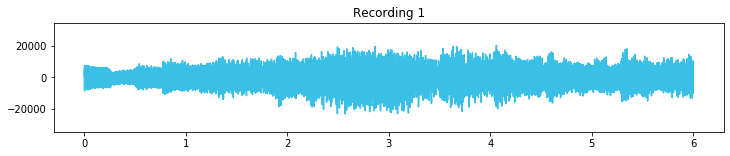

In [6]:
import matplotlib.pyplot as plt

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))


plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

In the same way, we can now load the other two wave files, **[ICA mix 2.wav](ICA mix 2.wav)** and **[ICA mix 3.wav](ICA mix 3.wav)**

C:\Users\asrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """
C:\Users\asrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """
C:\Users\asrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if sys.path[0] == '':
C:\Users\asrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


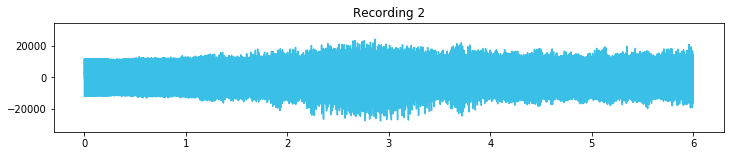

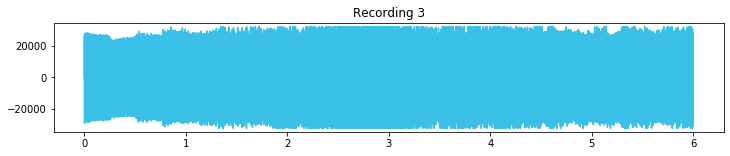

In [7]:

mix_2_wave = wave.open('ICA mix 2.wav','r')

#Extract Raw Audio from Wav File
signal_raw_2 = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_raw_2, 'Int16')


mix_3_wave = wave.open('ICA mix 3.wav','r')

#Extract Raw Audio from Wav File
signal_raw_3 = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_raw_3, 'Int16')


plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()


plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()


Now that we've read all three files, we're ready to [zip](https://docs.python.org/3/library/functions.html#zip) them to create our dataset.

* Create dataset ```X``` by zipping signal_1, signal_2, and signal_3 into a single list

In [8]:
X = list(zip(signal_1, signal_2, signal_3))

# Let's peak at what X looks like
X[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

We are now ready to run ICA to try to retrieve the original signals.

* Import sklearn's [FastICA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html) module
* Initialize FastICA look for three components
* Run the FastICA algorithm using fit_transform on dataset X

In [9]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)

ica_result = ica.fit_transform(X)

```ica_result``` now contains the result of FastICA, which we hope are the original signals. It's in the shape:

In [10]:
ica_result.shape

(264515, 3)

In [11]:
ica_result

array([[-7.36039652e-06, -1.59286205e-05, -6.53762887e-04],
       [-5.32052351e-06, -1.90561481e-04, -7.10762594e-04],
       [-9.02788675e-06, -3.59551323e-04, -6.13460206e-04],
       ...,
       [-2.74526410e-03, -1.92637053e-03, -3.95206064e-04],
       [-2.80434784e-03, -2.04853388e-03, -4.06104414e-04],
       [-2.84523651e-03, -2.16375997e-03, -5.34963668e-04]])

Let's split into separate signals and look at them

In [12]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

Let's plot to see how the wave forms look

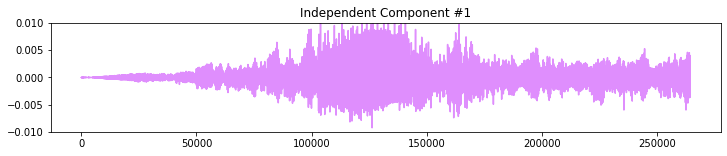

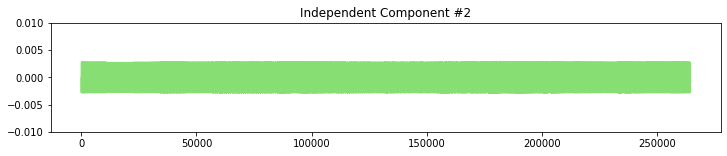

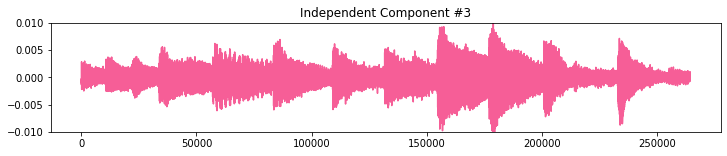

In [13]:
# Plot Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()

Do some of these look like musical wave forms? 

The best way to confirm the result is to listen to resulting files. So let's save as wave files and verify. But before we do that, we'll have to:
* convert them to integer (so we can save as PCM 16-bit Wave files), otherwise only some media players would be able to play them and others won't
* Map the values to the appropriate range for int16 audio. That range is between -32768 and +32767. A basic mapping can be done by multiplying by 32767.
* The sounds will be a little faint, we can increase the volume by multiplying by a value like 100

In [14]:
from scipy.io import wavfile

# Convert to int, map the appropriate range, and increase the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)


# Write wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

The resulting files we have now are: [note: make sure to lower the volume on your speakers first, just in case some problem caused the file to sound like static]
* [result_signal_1.wav](result_signal_1.wav)
* [result_signal_2.wav](result_signal_2.wav)
* [result_signal_3.wav](result_signal_3.wav)



Music:
* Piano - The Carnival of the Animals - XIII. The Swan (Solo piano version). Performer: Markus Staab
* Cello - Cello Suite no. 3 in C, BWV 1009 - I. Prelude. Performer: European Archive